Team ID:PNT2022TMID39529

### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

### Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Data Analysis

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

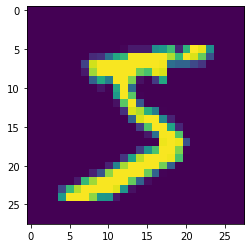

In [6]:
plt.imshow(X_train[0])

### Data Pre-Processing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Create model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 172s 91ms/step - loss: 0.3134 - accuracy: 0.9491 - val_loss: 0.0921 - val_accuracy: 0.9712
Epoch 2/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0728 - accuracy: 0.9779 - val_loss: 0.0835 - val_accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.0799 - val_accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.1084 - val_accuracy: 0.9739
Epoch 5/5
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.1197 - val_accuracy: 0.9757


### Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.1196647584438324, 0.9757000207901001]


In [17]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 19ms/step
[[5.5378612e-16 1.7728007e-20 3.4224883e-11 1.8678612e-11 1.5972426e-19
  5.1325656e-21 4.9924636e-22 1.0000000e+00 1.3263118e-15 6.2610637e-16]
 [2.2472630e-11 6.7568060e-08 9.9999952e-01 8.4264573e-10 1.8012667e-13
  7.4014782e-19 4.0431493e-07 1.2103722e-17 4.7889770e-10 1.8793439e-17]
 [1.9357573e-11 9.9999881e-01 2.6789410e-10 6.2075974e-15 1.1955570e-06
  6.7940514e-10 1.7682504e-08 8.5087323e-15 3.6363620e-08 6.9825486e-14]
 [1.0000000e+00 6.1628158e-17 1.9103983e-12 1.2842843e-16 1.7720624e-14
  9.0865790e-15 2.2446234e-09 1.2634779e-14 1.2079784e-10 4.2627037e-11]]


In [16]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

NameError: ignored

### Save the model

In [18]:
model.save("model.h5")

### Test the saved model

In [19]:
model=load_model("model.h5")

In [21]:
img = Image.open("sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

FileNotFoundError: ignored